Refernce this for notation conventions - https://lingpipe-blog.com/2009/10/13/whats-wrong-with-probability-notation/

---
# Introduction

We are going to create an artificial universe to demonstrate the ideas communicated in this book. We are new to creating universes, so we start by creating one in a single dimension. With a few keystrokes, our humble universe comes into existence as an infinite straight line.

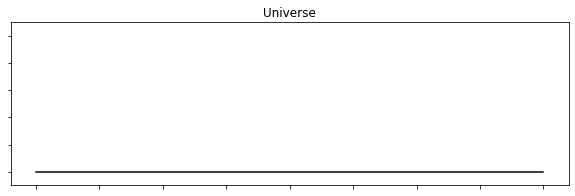

In [1]:
import numpy as np
import matplotlib
#matplotlib.use('nbagg')
#%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,3))
ax.set_ylim([-0.1,1.1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('Universe')
ax.plot([-1,1],[0,0],c='k')
plt.show()

To begin testing our powers, let's make something happen. An event in the center of the universe may be exciting. 

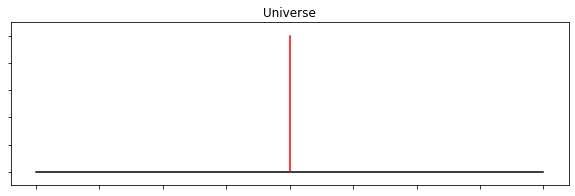

In [2]:
fig, ax = plt.subplots(figsize=(10,3))
ax.set_ylim([-0.1,1.1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('Universe')
ax.plot([-1,1],[0,0],c='k')
ax.plot([0,0],[0,1],c='r')
plt.show()

Actually, that wasn't very exciting. Our universe exists in one static moment with one event in the center. Let us create time and allow the event to repeat.

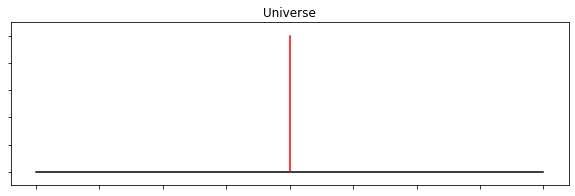

In [3]:
from ipywidgets import interactive

def u(i=0):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_ylim([-0.1,1.1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Universe')
    ax.plot([-1,1],[0,0],c='k')
    ax.plot([0,0],[0,1],c='r')
    plt.show()
    
interactive_plot = interactive(u, i=(0, 9999))
output = interactive_plot.children[-1]
interactive_plot

This is not much better. It would be more interesting if as time progressed the event ocurred in different locations. To implement this we could specify instructions that tell the event when and where to occur. However, knowing everything that will happen is also unexciting. We want to be entertained and surprised. We want to introduce some uncertainty. Before we can introduce uncertainty about where the event will occur next, we must first know all the possible locations where the event could occur. To be general we allow the event to occur anywhere in the one dimensional universe and we identify each location within it by $\omega \in \Omega$. The set of all possible locations $\Omega$ is called the *sample space*. Even with all possible locations where the event could occur, it is not clear how we compare different locations or how we choose one over another. Currently, all of our locations $\Omega$ are qualititaive. Our universe has no metric, measure, or units thus each location $\omega$ is just an idea, an abstraction. We must quantify these locations for them to become amenable to traditional analysis. To address this, we define a function $X(\omega)$ that maps every location $\omega \in \Omega$ to a real number $x \in \mathbb{R}$. This function is called a *random variable*. Random variables will become the conduit for us to express events and define probabilities. Unless necessary to explicitly define, the sample space will be specified implicitly through random variables.


With all possible locations defined we now wish to specify which ones the events should occur at. As we mentioned before we do not want to determine every location exactly as then there is no surprise. One way to do this is to specify the probability an event will occur at each location $\omega$. The notation to express this $P(\omega \in \Omega \ |\  X(\omega)=x)$ is read "the probability of $\omega$ given that the random variable $X$ has taken the value $x$". This is cumbersome and as we mentioned ealier the sample space is implicit in the random variable and is often ommitted in practice. In this case we read $P(X=x)$ or $P_X(x)$ as "the probability of event $x$" where it is clear $x$ comes from the random variable $X$. Classically a probability is expressed as a ratio. If we roll a die, there are six possible outcomes. From these outcomes there is only one two so the probability of rolling a two is $\frac{1}{6}$. The probability of rolling a one or a two, is two out of six or $\frac{1}{3}$. This classical approach does not work in our universe. The locations come from the real number line which contains uncountably infinite elements, so the probability of an event occuring at exactly one location is zero. For an interesting foray into the troubles faced when moving probability from the discrete world to the continuous one, see the Bertrand paradox. We need another way to express probability in this case. Rather than specify probability at individual locations we can specify it over intervals. In this way we express the probability that an event will occur in any place less than or equal to each location as $P(X \le x)$. This is called the cumulative distribution function or cdf. 

(Keep going and define th density function. Add examples)


With these probabilities and some way to turn the universe on, the events will begin to take place in seemingly random locations. While there is uncertainty about where the event will occur next, the locations are constrained such that as the number of events increases the frequencies of where they all occur will approach the probabilities we specified. This has another interesting interpretation. The events that occur when we turn the universe on form a set $S_1 = \{\omega_1^1,\omega_2^1,...\}$. We will call $S_i$ a process. We let this universe run indefinitely, and start up another universe according to the same rules. What is interesting is that even though the order of event locations differ in this second process $S_2 = \{\omega_1^2,\omega_2^2,...\}$ the relative frequencies are identical because they came from the same underlying process. In other words, we are implicitly defining infinitely many processes all with a common structure.

### Information

The goal is to make our fledgling universe interesting and our choice of probabilities must reflect that. We will define interesting in terms of surprise. The more surprised we are by an event the less we expected it, and the less we expected it, often the more interesting it becomes. Therefore, the amount of surprise we experience when we observe an event at a particular location $x$ of the random variable $X$ can be explained in terms of its probability. 

If an event were to occur at a specific location, how surprised would we be by that? We are surprised when something happens that we did not expect, in other words, something that we thought was unlikely to happen. 

(continue and add much more about information theory)

### Learning

Now imagine there exists a one dimensional creature in our one dimensional universe. This creature is equipped with a mechanism for sensing the universe, but it also generates only one dimensional observations. As time continues on its unyeilding journey forward, the creature will be presented with stimuli from the one dimensional universe. Every new moment in time will present the creature with new stimuli. These stimuli come from an unknown distribution. In the worst case, there is no structure in the universe. All stimuli are equally likely and come from a uniform distribution. As that would produce a very boring universe, we will assume this is not the case. Therefore to navigate and reason in this one dimensional universe, the creature must make a model of the distribution producing the stimuli it senses. When it can identify what stimuli it is being presented with, it must then associate them with some cause and effect. For our thought experiment we will assume that the unkown data generating distribution is bimodal. In particular there is one group of stimuli that are noxious, and another that are rewarding to the creature. Before it can learn which stimuli are good and bad, it must first learn to identify them. Therefore we begin with the process of modeling the data generating distribution.

---
### The Dataset

To begin with, let us assume the creature cannot learn in real time. In other words, it navigates the world collecting observations and after being exposed to $N$ observations, it updates its internal model. We represent these $N$ observations as $\mathrm{X} = \{x_i\}$ where $i=1,\dots,N$ and $x \in \mathbb{R}$. As mentioned in the introduction $p(x)$ is bimodal and produces two types of stimuli - one harmful and one beneficial to the creature. We represent this process by a bimodal mixture of Gaussians. 

$$p(x) = \frac{1}{2}\mathcal{N}(x \hspace{2pt}\big\vert -1,0.2)+\frac{1}{2}\mathcal{N}(x \hspace{2pt}\big\vert 1,0.2)$$

In [4]:
import sys
sys.path.append("../")
from Brain import GMM

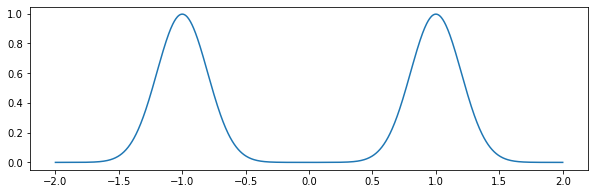

In [5]:
p = GMM([0.5,0.5], np.array([[-1,.2], [1,.2]]))
t = np.linspace(-2,2,1000)
p_y = p(t)
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(t,p_y)
plt.show()

### Maximum Likelihood

(Determining a distribution from a finite set of observations is a problem called desnity estimation. It is a fundamentally ill-posed problem as there exists infinitely many distributions that could have given rise to the observations. Choosing the distribution is a problem called model selection.)

The creature's one dimensional sensing mechanism will be modeled by a univariate Gaussian $q(x)$ with unspecified parameters. To ease analysis we express the variability in the Gaussian by its precision, $\lambda = \frac{1}{\sigma^2}$.

$$q(x) = \mathcal{N}(x \hspace{2pt}\big\vert \mu,\lambda^{-1})$$
$$= \frac{1}{\sqrt{2 \pi}}\sqrt{\lambda}\exp\{-\frac{1}{2}(x-\mu)^2 \lambda \}$$

We will find that the natural logarithm of this expression arises frequently in our analysis. We compute it here for easy reference. Unless otherwise specified, $\log$ will always denote the natural logarithm.

$$\log q(x) = \log\frac{1}{\sqrt{2 \pi}} + \log \sqrt{\lambda} + \log \exp\{-\frac{1}{2}(x-\mu)^2 \lambda \}$$
$$ = -\frac{1}{2}\log 2 \pi + \frac{1}{2} \log \lambda - \frac{1}{2}(x-\mu)^2 \lambda$$

The creature's goal is to identify important stimuli in the universe. Before it knows whether a stimulus is important or not, it must first recognize a stimulus. This can be done by modeling the process generating the data. If the creature's only mechanism for perceiving the universe is its Gaussian sensor $q(x)$, then the objective should be to specify its parameters $\mu$ and $\lambda$ such that $q(x)$ describes the observed data $\mathrm{X}$ as best as possible. After all, the observed data is the only measure it has of the universe's distribution $p(x)$. To carry this out, we must be more specific in what we mean by describing the data. An intuition is that we would like our distribution $q(x)$ to capture the variability in the data and perhaps identify elements that may be more common than others. A natural way to quantify this subjective notion is to use the language of statistics and probability theory. One approach is to choose the values of $\mu$ and $\lambda$ such that the probability of the data $q(\mathrm{X})$ is as high as possible, for all the observations $x_i \in \mathrm{X}$, then we will have  accomplished our goal of choosing a $q(x)$ that best describes our data, statistically.

$$\max_{\mu,\lambda} q(\mathrm{X}; \mu, \lambda)$$

Because the samples were drawn independently from the same distribution, the joint probability over all samples is equal to the product of each sample's individual probability.

$$q(\mathrm{X}) = q(x_1,x_2,...,x_N)$$
$$= \prod_i^N q(x_i)$$

If we maximize this expression directly, by setting its partial derivatives equal to zero, we will be confronted by a cumbersome chain rule with $N$ components each with $N$ terms. We can avoid this all together by recalling that an argument $\theta^*$ that optimizes an objective $\nabla f(\theta^*)=0$, will also optimize any monotonic function $g$ of that same objective $\nabla g(f(\theta^*))=0$. Therefore, rather than maximizing $q(\mathrm{X})$ directly we can maximize its logarithm $\log q(\mathrm{X})$ and exploit the property that a logarithm of a product is equal to a sum of logarithms. This is perhaps the most common approach to fitting a distribution to data and is called maximum likelihood (ML) or maximum log-likelihood (MLL) in some statistical settings.

$$\max_{\mu,\lambda} \log q(\mathrm{X}) = \max_{\mu,\lambda} \sum_i^N \log q(x_i)$$
$$= \max_{\mu,\lambda}\{  -\frac{N}{2}\log 2 \pi + \frac{N}{2} \log \lambda - \sum_i^N \frac{1}{2}(x_i-\mu)^2 \lambda\}$$

We begin by taking the partial derivative of $\log q(x_i)$ with respect to $\mu$ and equating it to zero.

$$ \frac{\partial}{\partial \mu} \log q(x_i) = - \sum_i^N (x_i-\mu) \lambda$$
$$\sum_i^N (x_i-\mu) = 0$$
$$\mu_{ML} = \frac{1}{N}\sum_i^N x_i$$

The $\mu_{ML}$ that maximizes the probability of our data, in the Gaussian sense, is the uniformly weighted sample mean. In other words, a bell centered over the middle of our dataset makes each element as probable as possible, on average. To find the shape of this bell, in other words how wide or narrow it should be, we must determine the optimal parameter of $\lambda$ as well. Our ML solution for the Gaussian mean is independent of $\lambda$. This allows us to substitute $\mu_{ML}$ into our expression and maximize the $\log q(\mathrm{X})$ directly for lambda.

$$ \frac{\partial}{\partial \lambda} \log q(x_i) = \frac{N}{2 \lambda} - \sum_i^N \frac{1}{2}(x_i-\mu_{ML})^2$$
$$\frac{N}{\lambda} - \sum_i^N (x_i-\mu_{ML})^2 = 0$$
$$\frac{1}{\lambda_{ML}} = \frac{1}{N}\sum_i^N (x_i-\mu_{ML})^2$$

We find that the optimal precision parameter $\lambda_{ML}$ is equal to the inverse of the sample variance. This seems to match our intuition, but as we will see the univariate Gaussian can only describe unimodal data. When confronted with data originating from a multimodal process the Gaussian does a poor job of capturing the intrinsic variability in the data. 

Armed with our ML parameter solutions we can now fit our Gaussian $q(x)$ to the dataset $\mathrm{X}$.

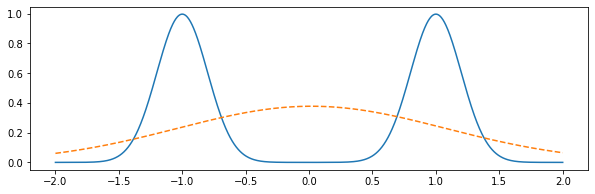

In [6]:
samples, labels = p.sample(1000)
mu_ml = samples.mean()
lambda_ml = 1/samples.var()
q = GMM([1], np.array([[mu_ml,1/lambda_ml]]))
q_y = q(t)
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(t,p_y)
ax.plot(t,q_y,ls='dashed')

---
### Online Learning with Sequential Data

We now consider the case where our agent is able to learn after each example. This form of learning is more consistent with what we observe in nature and can be expressed with a small modification to our maximum likelihood solutions. We begin by extracting the $N^\text{th}$ observation

$$\mu_{ML}^N = \frac{1}{N}\sum_{i=1}^Nx_i$$
$$= \frac{1}{N} x_N + \frac{1}{N}\sum_{i=1}^{N-1}x_i$$

Next we identify the sum in the second term as the maximum likelihood mean of the first $N-1$ terms $\mu_{ML}^{(N-1)}$ multiplied by $(N-1)$.

$$\mu_{ML}^N = \frac{1}{N} x_N + \frac{1}{N}(N-1)\mu_{ML}^{(N-1)}$$
$$= \mu_{ML}^{(N-1)} + \frac{1}{N}(x_N - \mu_{ML}^{(N-1)})$$

An analogous derivation leads to a similar formula for the sequential update of the precision. Though in this case it is more conveniently expressed in terms of the variance.

$$\sigma_{ML}^{2^{(N)}}= \sigma_{ML}^{2^{(N-1)}} + \frac{1}{N}\bigg[\big(x_N - \mu_{ML}\big)^2 - \sigma_{ML}^{2^{(N-1)}} \bigg]$$

An issue that must be addressed when using online learning is how to handle the first observation. As we see when $N=1$ both equations depend on a mean $\mu_{ML}^{(0)}$ and variance $\sigma_{ML}^{2^{(0)}}$ that have not been defined. In practice these values are often randomly initialized and here we follow suit by setting them to $\mu=1$ and $\lambda=5$. Though the initial values have been shown to play a significant role in the performance of many optimization routines and if possible care should be taken when choosing them.

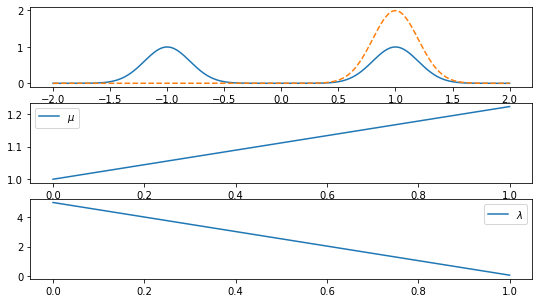

In [7]:
m = [1]
l = [5]
t = np.linspace(-2,2,1000)

def call_back(i=0):
    global m, l
    mu = m[-1]
    lamda = l[-1]
    q = GMM([1], np.array([[mu,1/lamda]]))
    q_y = q(t)
    fig, ax = plt.subplots(3,1,figsize=(9,5))
    ax[0].plot(t,p_y)
    ax[0].plot(t,q_y,ls='dashed')
    c = 1/(i+1)
    x = samples[np.random.randint(0,1000)]
    l.append(lamda + c*((x-mu)*(x-mu)-lamda))
    m.append(mu + c*(x-mu))
    ax[1].plot(m,label="$\mu$"); ax[1].legend()
    ax[2].plot(l,label="$\lambda$"); ax[2].legend()


    plt.show()
    
interactive_plot = interactive(call_back, i=(0, 999))
output = interactive_plot.children[-1]
interactive_plot

As expected the online approach converges heuristically to the same solution as the batch approach. This iterative scheme was derived by maximizing the log-likelihood function on a set of observations and then rewriting it recursively. However, we can instead maximize the log-likelihood function directly using a technique called gradient ascent.

### Optimization

Later we will take a deep dive into the various forms of learning and how optimization fits into that picture. Let us first recall the problem we are solving and then cast it in the language of optimization. Our agent was subjected to a collection of observations from the universe and we are interested in devising a method for its sensor to automatically update so the same observations are better identified in the future. The observations are in the set $\mathrm{X}$ and the sensor that operates on each observation is the gaussian pdf $q(x;\mu,\lambda)$. We posed the objective as finding the parameters $\mu$ and $\lambda$ that made the probability of the observations under the gaussian $q$ as large as possible, for all of the data. 

$$\max_{\mu,\lambda} q(\mathrm{X};\mu,\lambda)$$

If this is achieved, the hope is that when the sensor is next presented with an observation from the same data generating distribution, it will trigger a maximal response. In effect the sensor became a detector indicating the presence, or lack-there-of, of simuli coming from the data generating process. As before, the joint distribution factorizes.

$$q(\mathrm{X};\mu,\lambda) = q(x_1,x_2,...,x_N;\mu,\lambda)$$
$$= \prod_i^N q(x_i;\mu,\lambda)$$

In the language of optimization the final expression is called an objective function. We can generalize this process with the following definition

Given a function $f(x)$ that maps $x$ from some set $A$ to the real numbers $\mathbb{R}$ find $x^*$ such that $f(x^*) \ge f(x)$ for all $x$ in $A$. This is an unconstrained optimization problem and for general functions $f$ it is not possible to find a solution. However, for well behaved functions that obey certain properties such as convexity, this problem becomes tractable. For a thorough exploration of convex optimization see (Convex Optimization, With Corrections 2008 1st Edition by Stephen Boyd, Lieven Vandenberghe).

A common point of confusion when first computing maximum likelihood solutions is about what function is being optimized. Our pdf $q(x;\mu,\lambda)$ is a function of the events $x$ from our random variable $X$ and is parameterized by $\mu$ and $\lambda$. For example when $\mu=1$ and $\lambda=5$

$$q(x;\mu=1,\lambda=5) = \sqrt{\frac{5}{2 \pi}}\exp\{-\frac{5}{2}(x-1)^2 \}$$

We see clearly $q$ depends only on $x$ and its plot is shown in the figure below

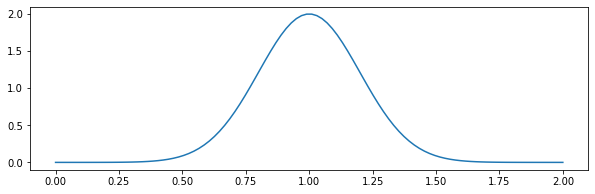

In [8]:
t = np.linspace(0,2,100)
q = GMM([1], np.array([[1,1/5]]))
q_y = q(t)
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(t,q_y)
plt.show()

The confusion arises when we apply the optimization definition directly which says we must find the variable $x$ that maximizes the pdf. This is just a little mathematical slight of hand resulting from an imprecise specification of exactly what function is being optimized. When we observe values of the random variable $x$ we view the function $q(x; \mu, \lambda)$ differently. The observed random variable becomes the parameter and $q$ becomes a function of both $\mu$ and $\lambda$. It is no longer required to be a pdf as the integral over both $\mu$ and $\lambda$ is not guaranteed to equal 1. This is made clear by defining a new function for when $x$ is observed.

$$f(\mu,\lambda;\ x_0) =: q(x_0; \mu, \lambda)$$

For example when the random variable $x$ assumes a value $x=1$ the plot of $f(\mu,\lambda;x=1)$ is shown below.

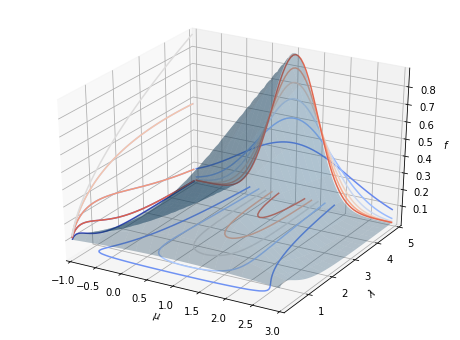

In [9]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

def f(mu,lamda,x):
    x = np.array(x)
    N = x.size
    val = 0
    c = lamda/2
    for xi in x:
        val += (xi-mu)**2
    return np.exp((N/2)*np.log(c/np.pi) - c*val)

mu_min = -1
mu_max = 3
mu_step = 0.05
l_min = 0.1
l_max = 5
l_step = 0.05

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]
mf = mu.flatten()
lf = lamda.flatten()
locs = np.where(1/lf<(1-mf)**2)[0]

z = f(mu,lamda,[1])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu, lamda, z, rstride=5, cstride=5, alpha=0.3)
cset = ax.contour(mu, lamda, z, zdir='z', offset=0.04, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

ax.set_xlabel('$\mu$')
ax.set_xlim(mu_min, mu_max)
ax.set_ylabel('$\lambda$')
ax.set_ylim(l_min, l_max)
ax.set_zlabel('$f$')

plt.show()

We can visually inspect this surface to guide our intuition about what values of $\mu$ and $\lambda$ will maximize our objective function $f(\mu, \lambda; x=1)$ or the likelihood function. We see clearly the peak along the $\mu$ axis is when $\mu=1$. This coincides with when the gaussian pdf $q(x)$ is centered over the observed value of $x=1$. It is less clear which value of $\lambda$ maximizes the general objective function. Within the domain where we have visualized the surface, it is along the boundary when $\lambda=5$. To guide our intuition further we look at $f(\mu,\lambda)$ for increasing values of $\lambda = [50,5000]$.

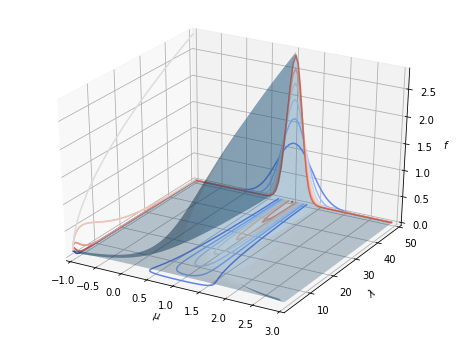

In [10]:
l_max = 50
l_step = 0.05

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]

z = f(mu,lamda,[1])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu, lamda, z, rstride=5, cstride=5, alpha=0.3)
cset = ax.contour(mu, lamda, z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

ax.set_xlabel('$\mu$')
ax.set_xlim(mu_min, mu_max)
ax.set_ylabel('$\lambda$')
ax.set_ylim(l_min, l_max)
ax.set_zlabel('$f$')

plt.show()

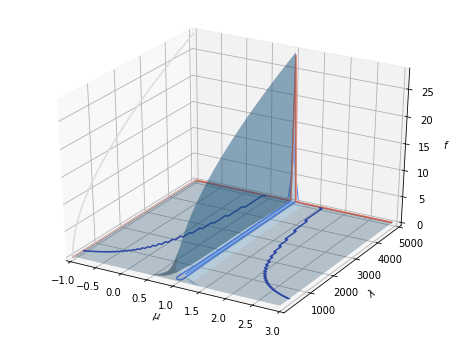

In [11]:
l_max = 5000
l_step = 5

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]

z = f(mu,lamda,[1])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu, lamda, z, rstride=5, cstride=5, alpha=0.3)
cset = ax.contour(mu, lamda, z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

ax.set_xlabel('$\mu$')
ax.set_xlim(mu_min, mu_max)
ax.set_ylabel('$\lambda$')
ax.set_ylim(l_min, l_max)
ax.set_zlabel('$f$')

plt.show()

It appears as though the value of the objective function increases without bound along the lambda axis. This turns out to be true and can be seen explicitly by combining equations (?)(?).

$$\mu_{ML} = \frac{1}{N}\sum_i^N x_i$$
$$\frac{1}{\lambda_{ML}} = \frac{1}{N}\sum_i^N (x_i-\mu_{ML})^2$$
$$\frac{1}{\lambda_{ML}} = \frac{1}{N}\sum_i^N (x_i-\frac{1}{N}\sum_j^N x_j)^2$$

We see that when the sample size is $N=1$, the optimal $\lambda_{ML}=\infty$

$$\frac{1}{\lambda_{ML}} = (x_1-x_1)^2 = 0$$

This problem arises because our sample contained only one element. Imagine a gaussian that would maximize the probability of that one point. When the gaussian $q(x;\mu,\lambda)$ is centered on the observation $x_1=1$ as the precision $\lambda$ increases, the value of $q(x;\mu,\lambda)$ increases. This can be seen in the figures above as the projection of the objective function onto the $\mu$ plane where the maximizing gaussian is shown by the red curve. The narrower the gaussian the higher the peak. 

The moment we introduce another distinct observation the unconstrained optimization problem $\max_{\mu,\lambda} q(\mathrm{X}; \mu, \lambda)$ becomes well posed and a solution exists. For example, let us observe two values $\mathrm{X}=\{1,2\}$

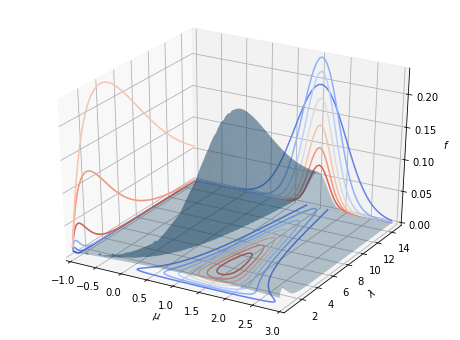

In [12]:
l_max = 15
l_step = 0.1

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]

z = f(mu,lamda,[1,2])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu, lamda, z, rstride=5, cstride=5, alpha=0.3)
cset = ax.contour(mu, lamda, z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

ax.set_xlabel('$\mu$')
ax.set_xlim(mu_min, mu_max)
ax.set_ylabel('$\lambda$')
ax.set_ylim(l_min, l_max)
ax.set_zlabel('$f$')

plt.show()

How does the surface change as we increase the number of observations?

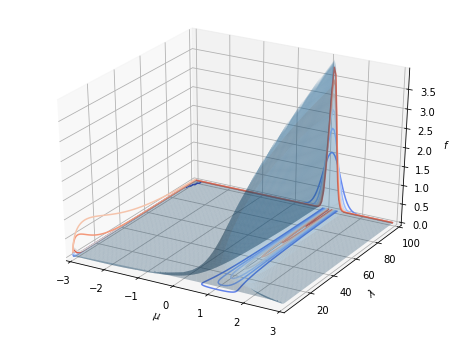

In [13]:
mu_min = -3
mu_max = 3
l_min = 0.1
l_max = 100
l_step = 0.3

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]
p = GMM([1], np.array([[1,1./5]]))
#p = GMM([0.5,0.5], np.array([[-1,.2], [1,.2]]))

def call_back(i=1):
    z = f(mu,lamda,p.sample(i)[0])
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(mu, lamda, z, rstride=3, cstride=3, alpha=0.3)
    cset = ax.contour(mu, lamda, z, zdir='z', offset=0, cmap=cm.coolwarm)
    cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
    cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

    ax.set_xlabel('$\mu$')
    ax.set_xlim(mu_min, mu_max)
    ax.set_ylabel('$\lambda$')
    ax.set_ylim(l_min, l_max)
    ax.set_zlabel('$f$')

    plt.show()
    
interactive_plot = interactive(call_back, i=(1, 1000))
output = interactive_plot.children[-1]
interactive_plot

The mean and variance appear to be sensitive to the number of observations. Lets examine their convergence as a function of observation count

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


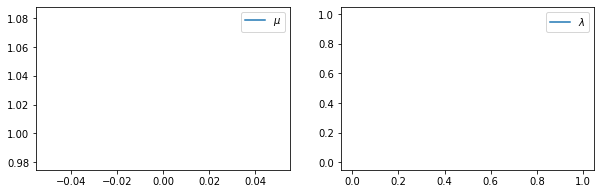

In [14]:
p = GMM([1], np.array([[1,1./5]]))
m = []
l = []
def call_back(i=1):
    global m, l
    x = p.sample(i)[0]
    m.append(x.mean())
    l.append(1/x.var())
    fig, ax = plt.subplots(1,2,figsize=(10,3))
    ax[0].plot(m,label="$\mu$")
    ax[0].legend()
    ax[1].plot(l,label="$\lambda$")
    ax[1].legend()

    plt.show()
    
interactive_plot = interactive(call_back, i=(1, 1000))
output = interactive_plot.children[-1]
interactive_plot

Our aim is to find the values of $\mu$, and $\lambda$ that make the objective function $f(\mu, \lambda; \mathrm{X})$ as large as possible. To ease notation we will drop the dependence on $\mathrm{X}$ and consider the multiple parameters as a vector $\boldsymbol{\theta} = (\mu, \lambda)^\top$. Our objective function becomes $f(\boldsymbol{\theta})$. If a particular location in the parameter space $\boldsymbol{\theta}_0$ is an extrema then the gradient of the objective function at that location will be the zero vector. If this condition is met, we call $\boldsymbol{\theta}_0$ a maximizer and usually give it significance with special notation $\boldsymbol{\theta}_0 = \boldsymbol{\theta}^*$.

$$\nabla f(\boldsymbol{\theta}^*) = \boldsymbol{0}$$

If our particular parameter value $\boldsymbol{\theta}_0$ is not a maximizer, then the gradient $\nabla f(\boldsymbol{\theta}^*)$ is not zero. However we can still use information from the gradient to learn more about the location of the extrema. The gradient is a vector-valued function that maps an input vector $\boldsymbol{\theta} \in \mathbb{R}^n$ to a separate output vector $\nabla f(\boldsymbol{\theta}; \mathrm{X}) \in \mathbb{R}^n$. When the gradient is not zero it has a magnitude and is pointing in a direction. We can examine both through the lens of the directional derivative. The value of the derivative of a multivariate function at $\boldsymbol{\theta}$ in a particular direction $\boldsymbol{u}$ is expressed as

$$\nabla_{\boldsymbol{u}} f(\boldsymbol{\theta}) = \nabla f(\boldsymbol{\theta}) \cdot \boldsymbol{u}$$

where $\boldsymbol{u}$ is a unit vector. If we rewrite the right hand side with the definition of the inner product and acknowledge that the magnitude of a unit vector is one, the directional derivative becomes

$$\nabla_{\boldsymbol{u}} f(\boldsymbol{\theta}) = ||\nabla f(\boldsymbol{\theta})|| \cos(\phi)$$

where $\phi$ is the angle between the gradient $\nabla f(\boldsymbol{\theta})$ and the unit vector $\boldsymbol{u}$. This deceptively simple expression tells us a great deal about the gradient operator. Firstly, cosine is bounded between $-1 \le \cos(\phi) \le 1$ so at any location $\boldsymbol{\theta}$ the directional derivative has a maximum value of $||\nabla f(\boldsymbol{\theta})||$. Even more this maximum occurs when $\phi=0$ which implies that the unit vector $\boldsymbol{u}$ is pointing in the same direction as the gradient $\nabla f(\boldsymbol{\theta})$. In other words, the gradient at any particular location in parameter space $\nabla f(\boldsymbol{\theta}_0)$ is always pointing in the direction of steepest ascent. Using the same reasoning the directional derivative has a minimum value of $-||\nabla f(\boldsymbol{\theta})||$ and occurs when the unit vector $\boldsymbol{u}$ is pointing in the opposite direction of the gradient $-\nabla f(\boldsymbol{\theta})$. The direction that the gradient gives us is based on local information, one point to be precise. As a result, it is not guaranteed that a local extrema lie along the path in that direction. Consider walking in a small valley along a path that leads to the top of a mountain. The path you are walking on is increasing very gradually and the peak of the mountain is far away. However, the sides of the valley are very steep so the gradient at your particular location would point orthogonal to your path, up the valley. Indeed, once you reached the ridge of the valley following this path, the gradient there would take you correctly to the peak of the mountain. The point remains that the gradient is a local operation and only gives a clue about what direction to travel to reach a local extrema.



It is rare to be able to visualize the objective function like this. The dimensionality of the objective funtion depends on the number of parameters and most practical problems such as neural networks have thousands, even millions, of parameters. There are many techniques for reducing the dimensionality to aid in visualizing and understanding the structure of the high dimensional space. These include some of the simplest methods such as principle components analysis to more complex techniques such as stochastic neighbor embedding.

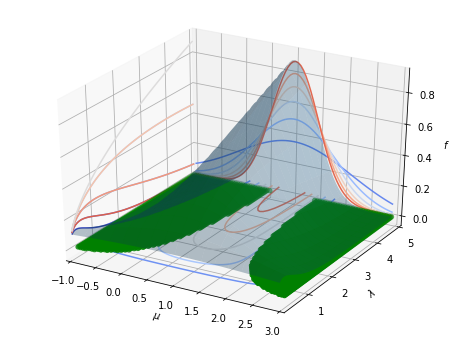

In [15]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

def f(mu,lamda,x):
    x = np.array(x)
    N = x.size
    val = 0
    c = lamda/2
    for xi in x:
        val += (xi-mu)**2
    return np.exp((N/2)*np.log(c/np.pi) - c*val)

mu_min = -1
mu_max = 3
mu_step = 0.05
l_min = 0.1
l_max = 5
l_step = 0.05

mu,lamda = np.mgrid[mu_min:mu_max:mu_step,l_min:l_max:l_step]
mf = mu.flatten()
lf = lamda.flatten()
locs = np.where(1/lf<(1-mf)**2)[0]

z = f(mu,lamda,[1])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu, lamda, z, rstride=5, cstride=5, alpha=0.3)
cset = ax.contour(mu, lamda, z, zdir='z', offset=0.04, cmap=cm.coolwarm)
cset = ax.contour(mu, lamda, z, zdir='x', offset=mu_min, cmap=cm.coolwarm)
#cset = ax.fill_between(mu[:,0], l_min, l_max, where=1/lamda[0]<(1-mu[:,0])**2, facecolor='green', interpolate=True)
cset = ax.scatter(mu.flatten()[locs], lamda.flatten()[locs], zdir='z', c='g')
cset = ax.contour(mu, lamda, z, zdir='y', offset=l_max, cmap=cm.coolwarm)

ax.set_xlabel('$\mu$')
ax.set_xlim(mu_min, mu_max)
ax.set_ylabel('$\lambda$')
ax.set_ylim(l_min, l_max)
ax.set_zlabel('$f$')

plt.show()

### Learning and Optimization

The concept of learning is difficult to define. It has been approached by psychologists, neuroscientists, philosophers, computer scientists and more. Each forray results in slightly different definitions (go into  all of them here)
The computer science definition allows us to extract a quantifiable measure of learning. "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.” (Mitchell, 1997) 

Judea Pearl partitions reasoning into three categories association, intervention, and counterfactuals. Each one employing more sophisticated forms of causal reasoning. How can we learn to reason in this way?

### Notes

An idea for non i.i.d. data. Allow there to be delays. In other words, we allow the standard static approximation technique to be applied to each individual observation, bu the output from each observation will combine in some subsequent layers due to delays. For example. The observations at time $n$ can be 

### KL and ML Demo

This section is going to be out of place from the top. I put it in here at the bottom for posterity. It should be integrated into the above dialogue. Here we quickly demonstrate how stochastically optimizing the likelihood with online learning is heuristically minimizes the Kullback-Leibler divergence. We are going to fit a univariate Gaussian to the below multimodal distribution. We will do this using two techniques. The first will be the traditional minimizatino of the reverse KL, the mode seeking version, and the second will be maximizing the likelihood with stocahstic online learning.

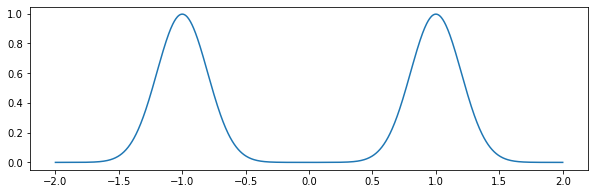

In [16]:
p = GMM([0.5,0.5], np.array([[-1,.2], [1,.2]]))
t = np.linspace(-2,2,1000)
p_y = p(t)
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(t,p_y)
plt.show()

### Features

An important area of research is how to constrain ML models to learn human interpretable features. A deep dive into adversarial examples gives us some insight into the mechanisms involved. For example see - http://gradientscience.org/adv/. In this blog post they discuss adversarial examples as being completely normal features for classifying images, similar to those that humans would find. While that makes sense, I believe a possible reason that these features learned from traditional ML algorithms are difficult to interpret are because they are learned top-down. In other words, we start with the final label and ask the network to learn features necessary to help it classify the input correctly. This is essentially an inverse problem.

Our approach, to the contrary, is bottom-up. The features that are learned are composed hierarchically based on the statistics of the data, independent of what we might want to label or classify it as. This has numerous benefits. Firstly, it bakes the intrinsic subjectivity of categorization directly into the processing pipeline. In other words, rather than saying "Hey machine, here are labels we humans have found. Now you learn them too." we're saying "Hey machine, here is some data, what are the labels present?" Secondly, it marries the concepts of supervised and unsupervised learning. A periodic reinforcing of the subjectively learned features can guide what categorization the algorithm learns - just like humans. We are constantly processing data in an unsupervised way, and from time to time we recieve strong feedback. Internally our features are all similar, but based on how we reinforce their composition we can arrive at strikingly different results. Certain labels are good and certain labels are bad. Where good and bad are themselves also subjective. It may be desireable for our algorithms to admit the same functionality.